# EDA

In [177]:
#Regular EDA and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [178]:
%matplotlib inline
sns.set_style('darkgrid')

In [179]:
data_df = pd.read_csv("TelcoCustomerChurn.csv")

In [180]:
pd.set_option('display.max_columns', None) 
data_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [181]:
data_df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [182]:
data_df.shape

(7043, 21)

In [183]:
data_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

## Analysis

#### CustomerId

We do not need customer ID in our analysis as it does not help us predict whether the cutomer will churn or not also, it increases the dimensionality.

In [184]:
data_df.shape

(7043, 21)

#### gender

In [185]:
data_df["gender"].head()

0    Female
1      Male
2      Male
3      Male
4    Female
Name: gender, dtype: object

In [186]:
data_df["gender"].dtype

dtype('O')

In [187]:
data_df["gender"].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [188]:
data_df["gender"].shape

(7043,)

In [189]:
data_df["gender"].isna().sum()

0

The gender column does not contain any missing values.

##### Comparing the gender column with the Churn column

A stacked bar graph would be an effective way to visually compare and analyze both columns.

Function to plot stacked bar graph

In [376]:
def stacked_bar_plot(df, group, target):
    """
    Generate a stacked bar plot to visualize the relationship between two categorical variables.

    Parameters:
    - df (pd.DataFrame): The input DataFrame containing the data.
    - group (str): The column name representing the grouping variable for the x-axis.
    - target (str): The column name representing the target variable for the stacked bars.

    Returns:
    None
    """
    fig, axes = plt.subplots(figsize = (5,4))
    alt_df = (df.groupby([group, target]).size()/df.groupby(group)[target].count()).reset_index().pivot(columns=target, index=group, values=0)
    alt_df.plot(kind='bar', stacked=True, ax = axes, color = ["teal", "tomato"])
    axes.xaxis.set_tick_params(rotation=0)
    axes.set_xlabel(group)
    axes.set_ylabel("Churn Rate")    

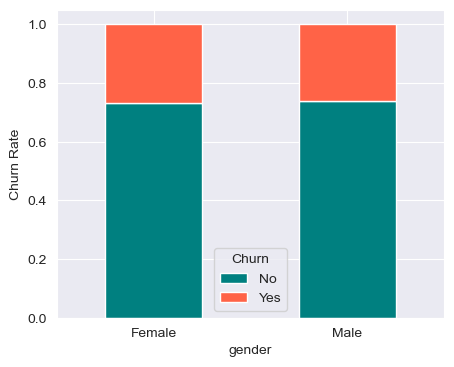

In [359]:
stacked_bar_plot(data_df, "gender", "Churn")

From the above plot, we can conclude that gender does not provide predictive insights into customer churn.

To simplify the understanding of gender, we will convert its data type from object to integer.

In [192]:
data_df["gender"].head()

0    Female
1      Male
2      Male
3      Male
4    Female
Name: gender, dtype: object

In [193]:
data_df["gender"].dtype

dtype('O')

In [194]:
data_df["gender"].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [195]:
data_df["gender"].shape

(7043,)

In [196]:
data_df["gender"].isna().sum()

0

#### SeniorCitizen

In [197]:
data_df["SeniorCitizen"].head()

0    0
1    0
2    0
3    0
4    0
Name: SeniorCitizen, dtype: int64

In [198]:
data_df["SeniorCitizen"].dtype

dtype('int64')

In [199]:
data_df["SeniorCitizen"].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

In [200]:
data_df["SeniorCitizen"].shape

(7043,)

In [201]:
data_df["SeniorCitizen"].isna().sum()

0

The SeniorCitizen column does not contain any missing values.

##### Comparing the SeniorCitizen column with the Churn column

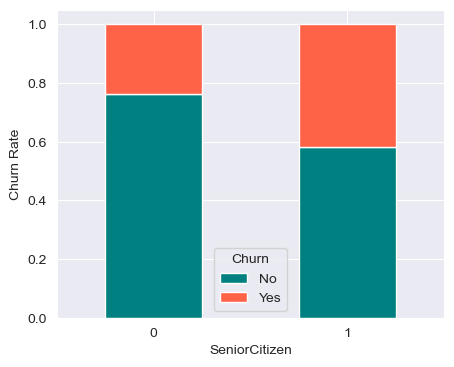

In [361]:
stacked_bar_plot(data_df, "SeniorCitizen", "Churn")

From the above plot, we can observe that younger individuals are less likely to churn.

#### Partner

In [203]:
data_df["Partner"].head()

0    Yes
1     No
2     No
3     No
4     No
Name: Partner, dtype: object

In [204]:
data_df["Partner"].dtype

dtype('O')

In [205]:
data_df["Partner"].value_counts()

Partner
No     3641
Yes    3402
Name: count, dtype: int64

In [206]:
data_df["Partner"].shape

(7043,)

In [207]:
data_df["Partner"].isna().sum()

0

The Partner column does not contain any missing values.

##### Comparing the Partner column with the Churn column

A stacked bar graph would be an effective way to visually compare and analyze both columns.

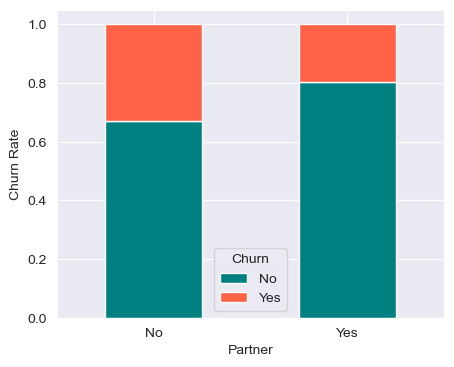

In [363]:
stacked_bar_plot(data_df, "Partner", "Churn")

From the above plot, we can observe that individuals with a partner are less likely to churn.

#### Dependents

In [209]:
data_df["Dependents"].tail()

7038    Yes
7039    Yes
7040    Yes
7041     No
7042     No
Name: Dependents, dtype: object

In [210]:
data_df["Dependents"].dtype

dtype('O')

In [211]:
data_df["Dependents"].value_counts()

Dependents
No     4933
Yes    2110
Name: count, dtype: int64

In [212]:
data_df["Dependents"].shape

(7043,)

In [213]:
data_df["Dependents"].isna().sum()

0

The Dependents column does not contain any missing values.

##### Comparing the Dependents column with the Churn column

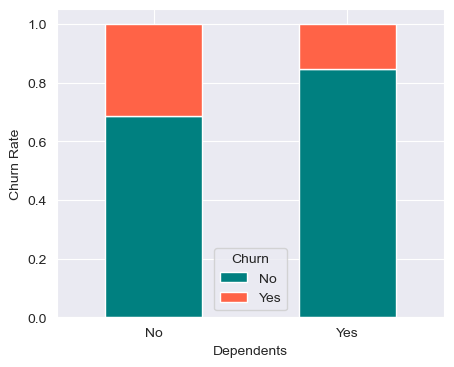

In [365]:
stacked_bar_plot(data_df, "Dependents", "Churn")

From the above plot, we can observe that individuals with Dependents are less likely to churn.

##### Comparing the SeniorCitizen, partner, and Dependents columns with each other

Function to plot a bar graph

In [215]:
def bar_plot(x,total_count):
    '''
    Generate a stacked bar plot to visualize the distribution of two categories.

    Parameters:
    - x (pd.Series): A Pandas Series containing data for the two categories to be compared.
    - total_count (int): The total count of observations or elements in the dataset.

    Returns:
    None

    '''
    
    fig, axes = plt.subplots(figsize = (5,4))
    plt.bar(x.index, x.values, color=["teal", "tomato"],width = 0.4)
    plt.xlabel('Churn')
    plt.ylabel('Count')
    plt.title(f'Total Count = {total_count}')
    plt.show()

In [216]:
mixed = data_df[(data_df.SeniorCitizen == 0) & (data_df.Partner == 'Yes') & (data_df.Dependents == 'Yes')].Churn.value_counts()
total = data_df[(data_df.SeniorCitizen == 0) & (data_df.Partner == 'Yes') & (data_df.Dependents == 'Yes')].Churn.value_counts().sum()
mixed,total

(Churn
 No     1437
 Yes     229
 Name: count, dtype: int64,
 1666)

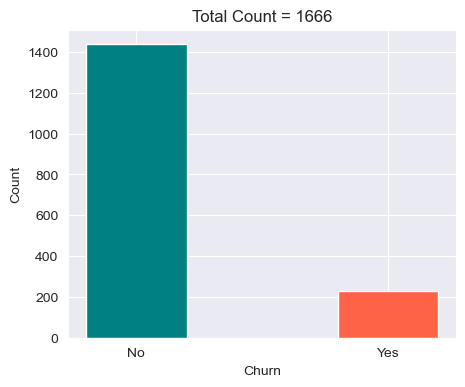

In [217]:
bar_plot(mixed,total)

From the above plot, we can infer that individuals who are young, have a partner, and have dependents are very unlikely to churn

In [218]:
mixed = data_df[(data_df.SeniorCitizen == 0) & (data_df.Partner == 'Yes') & (data_df.Dependents == 'No')].Churn.value_counts()
total = data_df[(data_df.SeniorCitizen == 0) & (data_df.Partner == 'Yes') & (data_df.Dependents == 'No')].Churn.value_counts().sum()
mixed,total

(Churn
 No     921
 Yes    242
 Name: count, dtype: int64,
 1163)

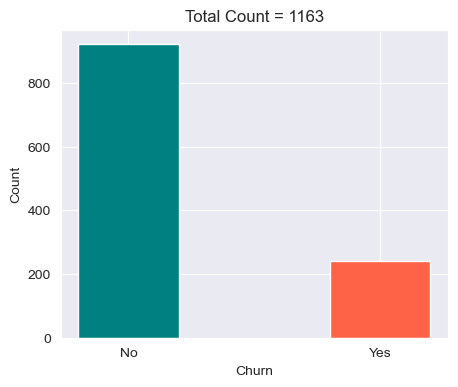

In [219]:
bar_plot(mixed,total)

From the above plot, we can infer that individuals who are young and have a partner are very unlikely to churn

In [220]:
mixed = data_df[(data_df.SeniorCitizen == 0) & (data_df.Partner == 'No') & (data_df.Dependents == 'No')].Churn.value_counts()
total = data_df[(data_df.SeniorCitizen == 0) & (data_df.Partner == 'No') & (data_df.Dependents == 'No')].Churn.value_counts().sum()
mixed,total

(Churn
 No     1872
 Yes     847
 Name: count, dtype: int64,
 2719)

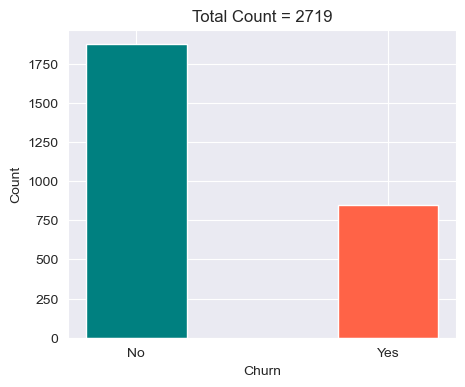

In [221]:
bar_plot(mixed,total)

from the above plot, we can infer that individuals without a partner or dependents are also very unlikely to churn.

In [222]:
mixed = data_df[(data_df.SeniorCitizen == 1) & (data_df.Partner == 'No') & (data_df.Dependents == 'No')].Churn.value_counts()
total = data_df[(data_df.SeniorCitizen == 1) & (data_df.Partner == 'No') & (data_df.Dependents == 'No')].Churn.value_counts().sum()
mixed,total

(Churn
 No     285
 Yes    276
 Name: count, dtype: int64,
 561)

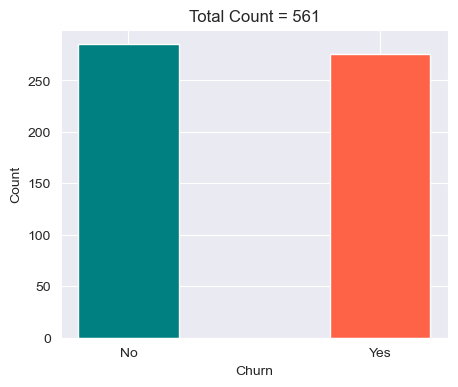

In [223]:
bar_plot(mixed,total)

From the above plot, we can infer that older individuals without a partner or dependents are likely to both churn and not churn equally.

#### tenure

In [224]:
data_df["tenure"].head()

0     1
1    34
2     2
3    45
4     2
Name: tenure, dtype: int64

In [225]:
data_df["tenure"].dtype

dtype('int64')

In [226]:
data_df["tenure"].value_counts()

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

In [227]:
data_df["tenure"].value_counts().sum()

7043

In [228]:
data_df["tenure"].shape

(7043,)

In [229]:
data_df["tenure"].isna().sum()

0

The tenure column does not contain any missing values.

##### Comparing the tenure column with the Churn column

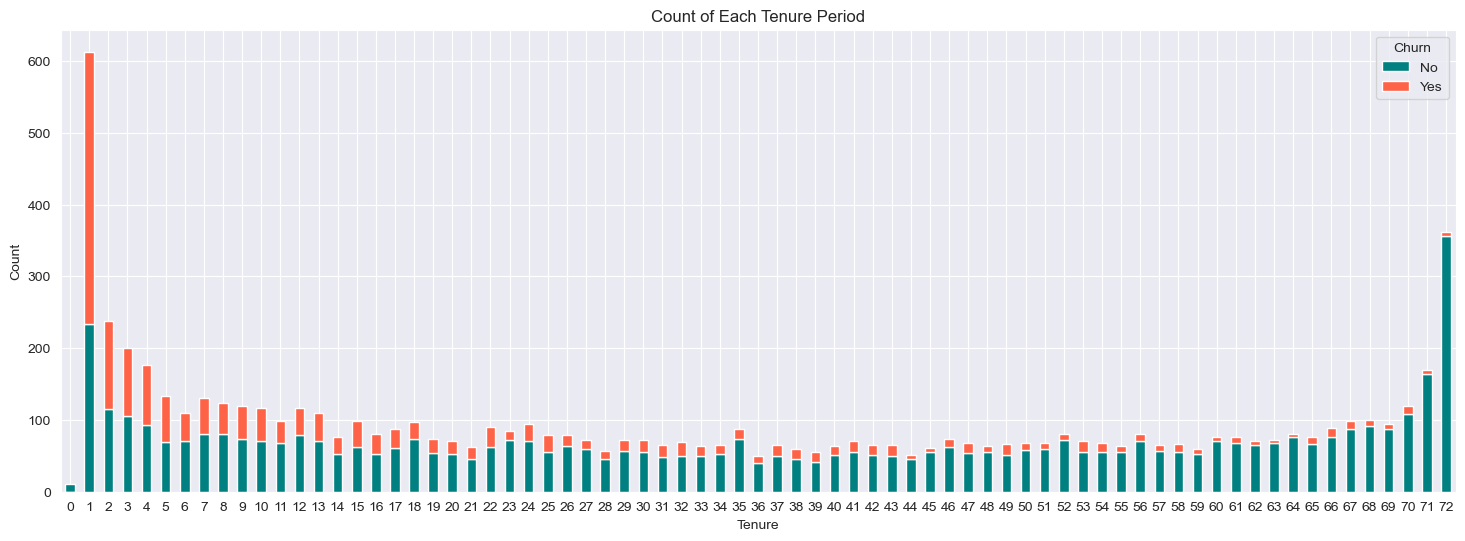

In [377]:
tenure_counts = data_df.groupby(['tenure', 'Churn']).size().unstack().fillna(0)
test = tenure_counts.plot(kind='bar', stacked=True, color=["teal", "tomato"], figsize=(18, 6))
test.xaxis.set_tick_params(rotation=0)
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.title('Count of Each Tenure Period')
plt.show()

As we can see the higher the tenure, the lesser the churn rate. This tells us that the customer becomes loyal with the tenure.

#### PhoneService

In [231]:
data_df["PhoneService"].head()

0     No
1    Yes
2    Yes
3     No
4    Yes
Name: PhoneService, dtype: object

In [232]:
data_df["PhoneService"].dtype

dtype('O')

In [233]:
data_df["PhoneService"].value_counts()

PhoneService
Yes    6361
No      682
Name: count, dtype: int64

In [234]:
data_df["PhoneService"].shape

(7043,)

In [235]:
data_df["gender"].isna().sum()

0

The PhoneService column does not contain any missing values.

##### Comparing the PhoneService column with the Churn column

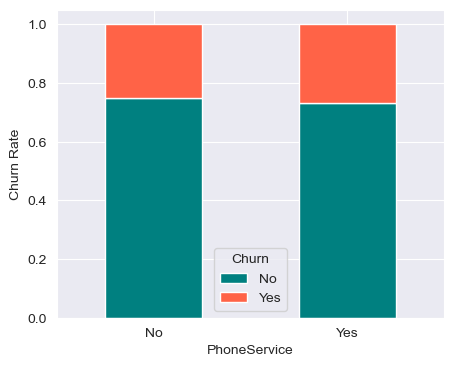

In [375]:
stacked_bar_plot(data_df, "PhoneService", "Churn")

As we can see, phone service does not add value to the model as it exhibits a similar churn rate.

#### MultipleLines

In [237]:
data_df["MultipleLines"].head()

0    No phone service
1                  No
2                  No
3    No phone service
4                  No
Name: MultipleLines, dtype: object

In [238]:
data_df["MultipleLines"].dtype

dtype('O')

In [239]:
data_df["MultipleLines"].value_counts()

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

In [240]:
data_df["MultipleLines"].shape

(7043,)

In [241]:
data_df["MultipleLines"].isna().sum()

0

The MultipleLines column does not contain any missing values.

##### Comparing the MultipleLines column with the Churn column

In [402]:
def stacked_bar_plot_lower(df, group, target):

    fig, axes = plt.subplots(figsize = (5,4))
    alt_df = (df.groupby([group, target]).size()/df.groupby(group)[target].count()).reset_index().pivot(columns=target, index=group, values=0)
    alt_df.plot(kind='bar', stacked=True, ax = axes, color = ["teal", "tomato"])
    axes.xaxis.set_tick_params(rotation=0)
    axes.set_xlabel(group)
    axes.set_ylabel("Churn Rate")
    legend = axes.legend(title=target, fontsize='10', loc='lower right')

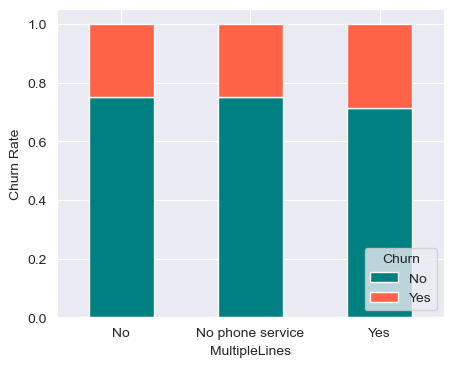

In [393]:
stacked_bar_plot_lower(data_df, "MultipleLines", "Churn")

The MultipleLines column does not contribute significantly to the model due to the consistent churn rate

#### InternetService

In [244]:
data_df["InternetService"].head()

0            DSL
1            DSL
2            DSL
3            DSL
4    Fiber optic
Name: InternetService, dtype: object

In [245]:
data_df["InternetService"].dtype

dtype('O')

In [246]:
data_df["InternetService"].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [247]:
data_df["InternetService"].shape

(7043,)

In [248]:
data_df["InternetService"].isna().sum()

0

The InternetService column does not contain any missing values.

##### Comparing the InternetService column with the Churn column

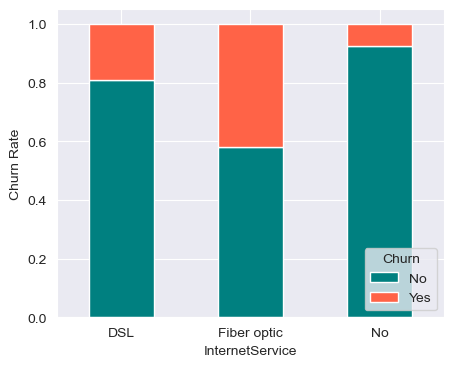

In [381]:
stacked_bar_plot_lower(data_df, "InternetService", "Churn")

From the above plot, we can observe that when the internet service is Fiber Optic, the churn rate is very high. This could be attributed to either the higher cost of fiber optic or potential concerns about its quality not meeting the expected standards. Moreover, individuals without internet service have the lowest churn rate, further supporting the possibility of dissatisfaction with the quality or cost of other available options

#### 	OnlineSecurity

In [250]:
data_df["OnlineSecurity"].head()

0     No
1    Yes
2    Yes
3    Yes
4     No
Name: OnlineSecurity, dtype: object

In [251]:
data_df["OnlineSecurity"].dtype

dtype('O')

In [252]:
data_df["OnlineSecurity"].value_counts()

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

In [253]:
data_df["OnlineSecurity"].shape

(7043,)

In [254]:
data_df["OnlineSecurity"].isna().sum()

0

The OnlineSecurity column does not contain any missing values.

##### Comparing the OnlineSecurity column with the Churn column

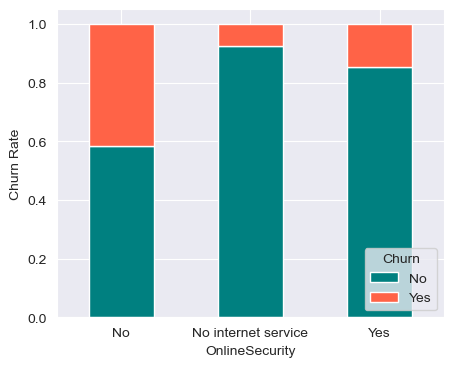

In [383]:
stacked_bar_plot_lower(data_df, "OnlineSecurity", "Churn")

From the above plot, we can observe that when there is no online security, the churn rate is very high.

#### OnlineBackup

In [256]:
data_df["OnlineBackup"].head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: OnlineBackup, dtype: object

In [257]:
data_df["OnlineBackup"].dtype

dtype('O')

In [258]:
data_df["OnlineBackup"].value_counts()

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

In [259]:
data_df["OnlineBackup"].shape

(7043,)

In [260]:
data_df["OnlineBackup"].isna().sum()

0

The OnlineBackup column does not contain any missing values.

##### Comparing the OnlineBackup column with the Churn column

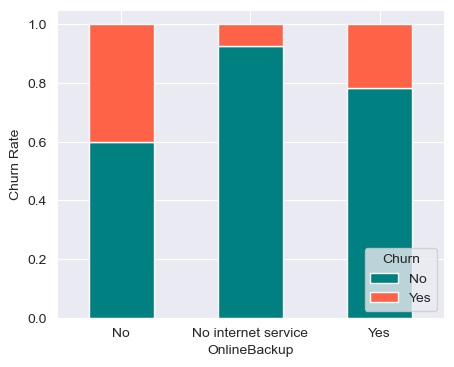

In [387]:
stacked_bar_plot_lower(data_df, "OnlineBackup", "Churn")

From the above plot, we can observe that when there is no online Backup, the churn rate is very high.

#### DeviceProtection

In [262]:
data_df["DeviceProtection"].head()

0     No
1    Yes
2     No
3    Yes
4     No
Name: DeviceProtection, dtype: object

In [263]:
data_df["DeviceProtection"].dtype

dtype('O')

In [264]:
data_df["DeviceProtection"].value_counts()

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

In [265]:
data_df["DeviceProtection"].shape

(7043,)

In [266]:
data_df["DeviceProtection"].isna().sum()

0

The DeviceProtection column does not contain any missing values.

##### Comparing the DeviceProtection column with the Churn column

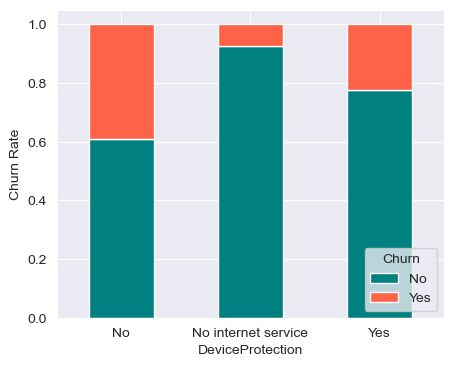

In [389]:
stacked_bar_plot_lower(data_df, "DeviceProtection", "Churn")

From the above plot, we can observe that when there is no Device Protection, the churn rate is very high.

#### TechSupport

In [268]:
data_df["TechSupport"].head()

0     No
1     No
2     No
3    Yes
4     No
Name: TechSupport, dtype: object

In [269]:
data_df["TechSupport"].dtype

dtype('O')

In [270]:
data_df["TechSupport"].value_counts()

TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64

In [271]:
data_df["TechSupport"].shape

(7043,)

In [272]:
data_df["TechSupport"].isna().sum()

0

The TechSupport column does not contain any missing values.

##### Comparing the TechSupport column with the Churn column

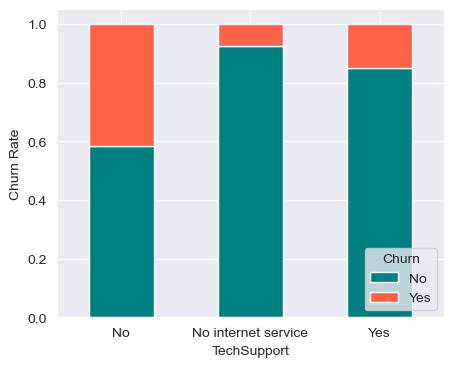

In [391]:
stacked_bar_plot_lower(data_df, "TechSupport", "Churn")

From the above plot, we can observe that when there is no TechSupport, the churn rate is very high.

#### StreamingTV

In [274]:
data_df["StreamingTV"].head()

0    No
1    No
2    No
3    No
4    No
Name: StreamingTV, dtype: object

In [275]:
data_df["StreamingTV"].dtype

dtype('O')

In [276]:
data_df["StreamingTV"].value_counts()

StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64

In [277]:
data_df["StreamingTV"].shape

(7043,)

In [278]:
data_df["StreamingTV"].isna().sum()

0

The StreamingTV column does not contain any missing values.

##### Comparing the StreamingTV column with the Churn column

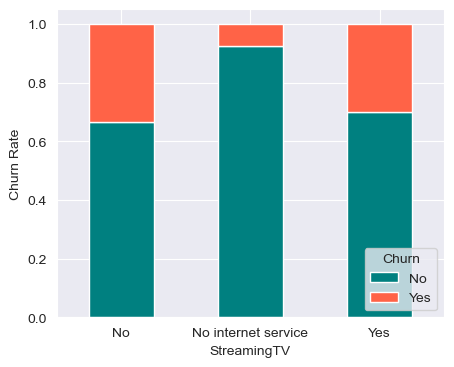

In [395]:
stacked_bar_plot_lower(data_df, "StreamingTV", "Churn")

From the above plot, we can observe that when there is no StreamingTV, the churn rate is very high.

#### StreamingMovies

In [280]:
data_df["StreamingMovies"].tail()

7038    Yes
7039    Yes
7040     No
7041     No
7042    Yes
Name: StreamingMovies, dtype: object

In [281]:
data_df["StreamingMovies"].dtype

dtype('O')

In [282]:
data_df["StreamingMovies"].value_counts()

StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64

In [283]:
data_df["StreamingMovies"].shape

(7043,)

In [284]:
data_df["StreamingMovies"].isna().sum()

0

The StreamingMovies column does not contain any missing values.

##### Comparing the StreamingTV column with the Churn column

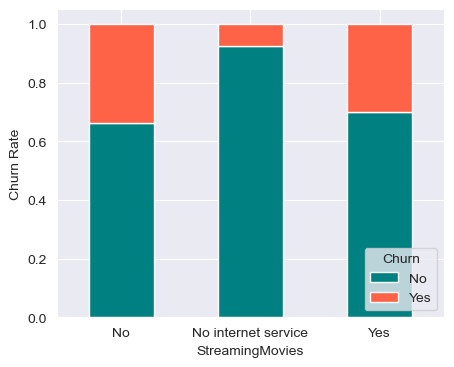

In [397]:
stacked_bar_plot_lower(data_df, "StreamingMovies", "Churn")

From the above plot, we can observe that when there is no StreamingMovies, the churn rate is very high.

In [286]:
(data_df.InternetService == 'No').sum()

1526

In [287]:
(data_df.OnlineSecurity == 'No internet service').sum()

1526

In [288]:
(data_df.OnlineBackup == 'No internet service').sum()

1526

In [289]:
(data_df.DeviceProtection == 'No internet service').sum()

1526

In [290]:
(data_df.TechSupport == 'No internet service').sum()

1526

In [291]:
(data_df.StreamingTV == 'No internet service').sum()

1526

In [292]:
(data_df.StreamingMovies == 'No internet service').sum()

1526

The columns ('InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV' and 'StreamingMovies') have the same amount of 'No internet service.' To reduce dependency, we need to either remove or encode these columns

In [293]:
data_df[data_df['InternetService'] == 'No'].iloc[:, 7:14].head()

,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV
11,No,No,No internet service,No internet service,No internet service,No internet service,No internet service
16,No,No,No internet service,No internet service,No internet service,No internet service,No internet service
21,No,No,No internet service,No internet service,No internet service,No internet service,No internet service
22,No,No,No internet service,No internet service,No internet service,No internet service,No internet service
33,No,No,No internet service,No internet service,No internet service,No internet service,No internet service


If an individual does not subscribe to internet service, they will also lack access to online security, online backup, device protection, tech support, streaming TV, and streaming movies

#### Contract

In [294]:
data_df["Contract"].head()

0    Month-to-month
1          One year
2    Month-to-month
3          One year
4    Month-to-month
Name: Contract, dtype: object

In [295]:
data_df["Contract"].dtype

dtype('O')

In [296]:
data_df["Contract"].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [297]:
data_df["Contract"].shape

(7043,)

In [298]:
data_df["Contract"].isna().sum()

0

The Contract column does not contain any missing values.

##### Comparing the Contract column with the Churn column

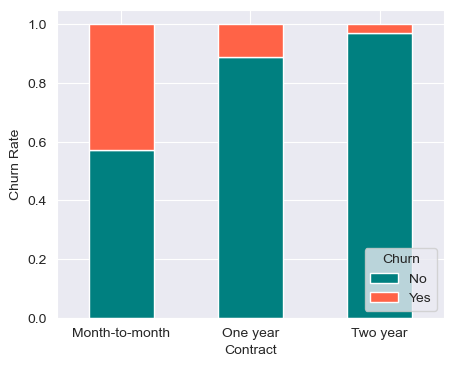

In [399]:
stacked_bar_plot_lower(data_df, "Contract", "Churn")

From the above plot, it is evident that the month-to-month contract exhibits a high churn rate, while the churn rate decreases with the increase in the contract period.

#### PaperlessBilling

In [300]:
data_df["PaperlessBilling"].head()

0    Yes
1     No
2    Yes
3     No
4    Yes
Name: PaperlessBilling, dtype: object

In [301]:
data_df["PaperlessBilling"].dtype

dtype('O')

In [302]:
data_df["PaperlessBilling"].value_counts()

PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64

In [303]:
data_df["PaperlessBilling"].shape

(7043,)

In [304]:
data_df["PaperlessBilling"].isna().sum()

0

The PaperlessBilling column does not contain any missing values.

##### Comparing the PaperlessBilling column with the Churn column

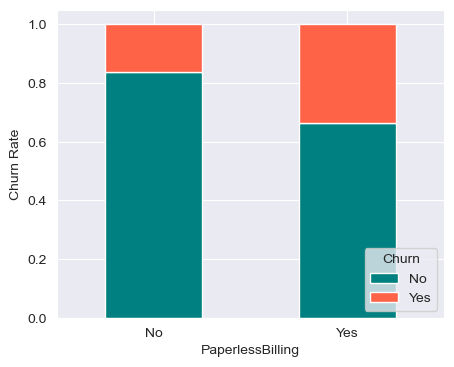

In [401]:
stacked_bar_plot_lower(data_df, "PaperlessBilling", "Churn")

From the above plot, we can observe that individuals selecting the PaperlessBilling method result in less churn. This might indicate that the service quality of PaperlessBilling is not good enough.

#### PaymentMethod

In [306]:
data_df["PaymentMethod"].head()

0             Electronic check
1                 Mailed check
2                 Mailed check
3    Bank transfer (automatic)
4             Electronic check
Name: PaymentMethod, dtype: object

In [307]:
data_df["PaymentMethod"].dtype

dtype('O')

In [308]:
data_df["PaymentMethod"].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [309]:
data_df["PaymentMethod"].shape

(7043,)

In [310]:
data_df["PaymentMethod"].isna().sum()

0

The PaymentMethod column does not contain any missing values.

##### Comparing the PaymentMethod column with the Churn column

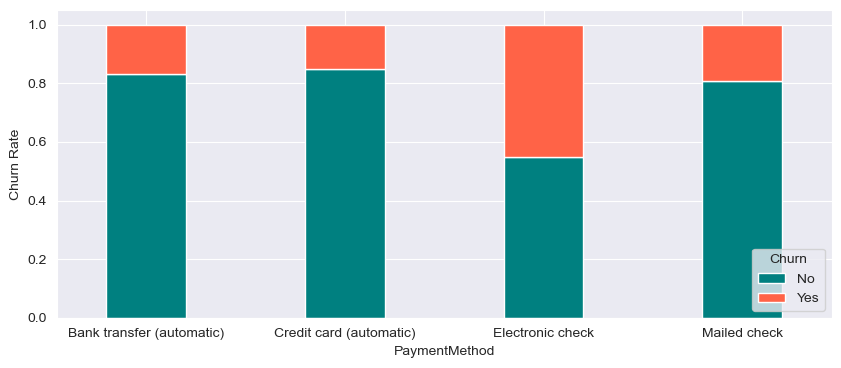

In [404]:
df1 = data_df
group = "PaymentMethod"
target = "Churn"
fig, axes = plt.subplots(figsize = (10,4))
alt_df = (df1.groupby([group, target]).size()/df1.groupby(group)[target].count()).reset_index().pivot(columns=target, index=group, values=0)
alt_df.plot(kind='bar', stacked=True, ax = axes, color = ["teal", "tomato"],width = 0.4)
axes.xaxis.set_tick_params(rotation=0)
axes.set_xlabel(group)
axes.set_ylabel("Churn Rate")
legend = axes.legend(title=target, fontsize='10', loc='lower right')

From the above plot, it is evident that the use of electronic checks is associated with a high churn rate.

##### Comparing the Contract, PaperlessBilling, and PaymentMethod columns with each other

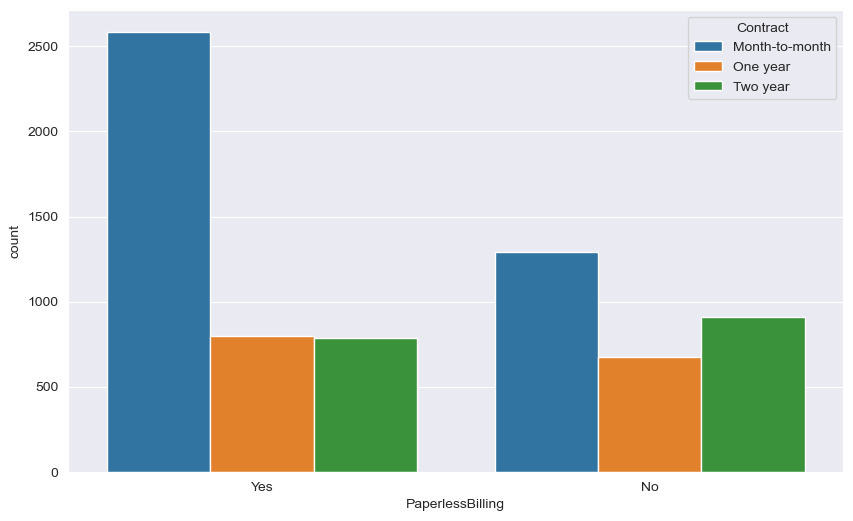

In [406]:
plt.figure(figsize=(10, 6))
sns.countplot(x = data_df['PaperlessBilling'], hue = data_df['Contract']);

From the above graph, it is evident that people with a month-to-month contract predominantly prefer PaperlessBilling.

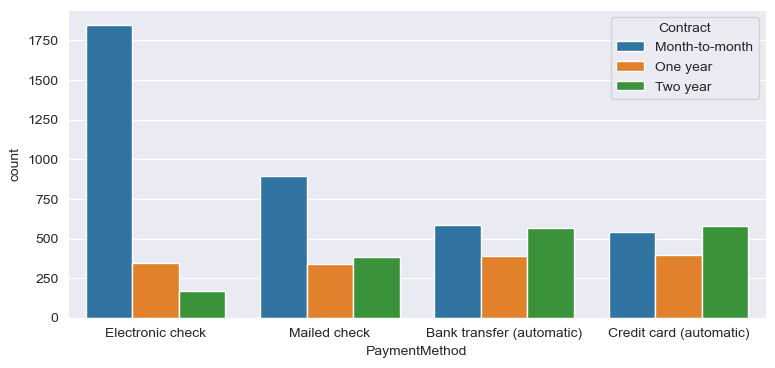

In [408]:
plt.figure(figsize=(9, 4))
sns.countplot(x = data_df['PaymentMethod'], hue = data_df['Contract']);

From the above graph, it is evident that people with a month-to-month contract predominantly prefer paying by electronic check

#### MonthlyCharges

In [314]:
data_df["MonthlyCharges"].head()

0    29.85
1    56.95
2    53.85
3    42.30
4    70.70
Name: MonthlyCharges, dtype: float64

In [315]:
data_df["MonthlyCharges"].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [316]:
data_df["MonthlyCharges"].dtype

dtype('float64')

In [317]:
data_df["MonthlyCharges"].value_counts()

MonthlyCharges
20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: count, Length: 1585, dtype: int64

In [318]:
data_df["MonthlyCharges"].shape

(7043,)

In [319]:
data_df["MonthlyCharges"].isna().sum()

0

The MonthlyCharges column does not contain any missing values.

##### Comparing the MonthlyCharges column with the Churn column

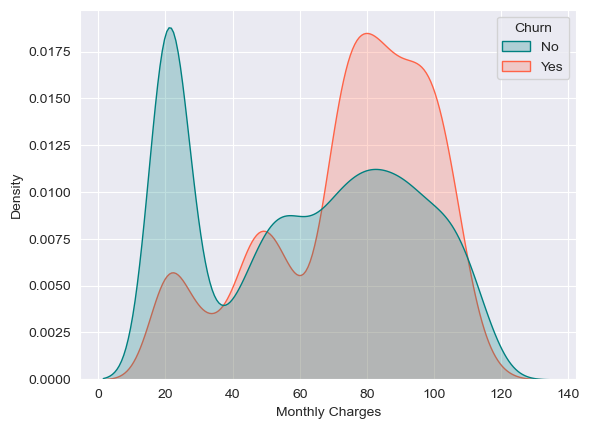

In [416]:
sns.kdeplot(x='MonthlyCharges', hue='Churn', data=data_df, fill=True,common_norm= False,palette = ["teal", "tomato"])
plt.xlabel('Monthly Charges')
plt.show()

From the above graph, it is noticeable that customers who pay higher monthly fees are more prone to churn.

#### TotalCharges

In [321]:
data_df["TotalCharges"].head()

0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: object

In [322]:
data_df["TotalCharges"].dtype

dtype('O')

In [323]:
data_df["TotalCharges"].value_counts()

TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

In [324]:
data_df["TotalCharges"].shape

(7043,)

In [325]:
data_df["TotalCharges"].isna().sum()

0

The TotalCharges column does not contain any missing values.

The column is currently classified as an object datatype. To plot graphs, it needs to be converted into float or int.

In [326]:
data_df['TotalCharges'] = pd.to_numeric(data_df['TotalCharges'], errors='coerce')

In [327]:
data_df['TotalCharges'].head()

0      29.85
1    1889.50
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: float64

In [328]:
data_df['TotalCharges'].dtype

dtype('float64')

In [329]:
data_df['TotalCharges'].value_counts()

TotalCharges
20.20      11
19.75       9
20.05       8
19.90       8
19.65       8
           ..
6849.40     1
692.35      1
130.15      1
3211.90     1
6844.50     1
Name: count, Length: 6530, dtype: int64

In [330]:
data_df['TotalCharges'].shape

(7043,)

In [331]:
data_df['TotalCharges'].isna().sum()

11

After converting to float, the column now contains NaN/null values. Previously, it showed no NaN/null values. This discrepancy might be due to incorrect inputs, strange spaces between numbers like ' ', or typos such as '1'2''.

In [332]:
data_df[data_df["TotalCharges"].isna()].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No


In [333]:
data_df["TotalCharges"].mean()

2283.3004408418656

In [334]:
data_df[data_df["TotalCharges"]>2283].shape[0]

2646

In [335]:
data_df["TotalCharges"] = data_df["TotalCharges"].fillna(data_df["TotalCharges"].mean())

In [336]:
data_df["TotalCharges"].isna().sum()

0

##### Comparing the TotalCharges column with the Churn column

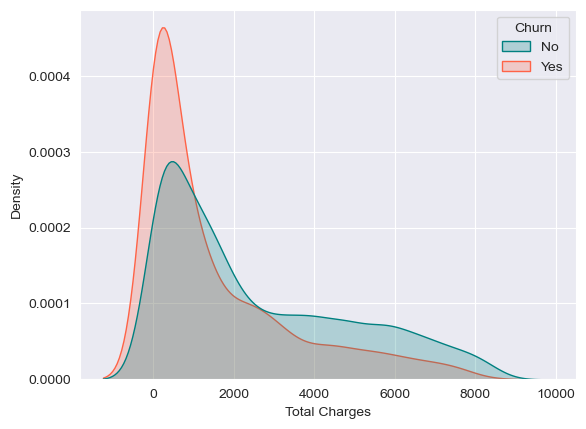

In [417]:
sns.kdeplot(x='TotalCharges', hue='Churn', data=data_df, fill=True,common_norm= False,palette = ["teal", "tomato"])
plt.xlabel('Total Charges')
plt.show()

From the above plot it is evident that the density of total charges for churning customers are high around 0. As many customers cancel the subsription in 1-2 months.

##### Comparing the tenure, MonthlyCharges, and TotalCharges columns with each other

In [338]:
Total_by_monthly = (data_df["MonthlyCharges"]*data_df["tenure"])

In [339]:
Total_by_monthly

0         29.85
1       1936.30
2        107.70
3       1903.50
4        141.40
         ...   
7038    2035.20
7039    7430.40
7040     325.60
7041     297.60
7042    6972.90
Length: 7043, dtype: float64

In [340]:
data_df["TotalCharges"]

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [341]:
correlation = Total_by_monthly.corr(data_df['TotalCharges'])
print(f'Correlation between Total_by_monthly and TotalCharges: {correlation}')

Correlation between Total_by_monthly and TotalCharges: 0.9987673485856693


Based on the correlation observed above, the data exhibits stability

#### Churn

In [342]:
data_df["Churn"].head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [343]:
data_df["Churn"].dtype

dtype('O')

In [344]:
data_df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [345]:
data_df["Churn"].shape

(7043,)

In [346]:
data_df["Churn"].isna().sum()

0

The Churn column does not contain any missing values.

In [347]:
data_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

## Function to prepare data for model building based on EDA

In [348]:
data_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [349]:
def baseline_Model_Preparation(filepath):
    '''
    This is a straightforward function for minimal data preparation intended for the baseline model.
    Parameters:
    - filepath (str): The file path of the dataset.

    Returns:
    - pandas.DataFrame: The prepared DataFrame for the baseline model.
    
    '''                               
    data_df = pd.read_csv(filepath)
    
    #.1(customerID)
    data_df = data_df.drop("customerID",axis = 1)

    #.2(gender)
    data_df["gender"] = data_df["gender"].map({'Male': 1, 'Female': 0})
    
    #.3(InternetService)
    data_df["InternetService"] = data_df["InternetService"].map({'Fiber optic': 1, 'DSL': 2,'No' : 0})

    #.4(MultipleLines)
    data_df["MultipleLines"] = data_df["MultipleLines"].map({'Yes': 1, 'No': 0,'No phone service' : 0})

    #.5(Contract)
    data_df["Contract"] = data_df["Contract"].map({'Month-to-month': 0, 'Two year': 2,'One year' : 1})

    #.6(PaymentMethod)
    data_df["PaymentMethod"] = data_df["PaymentMethod"].map({'Electronic check': 0, 'Mailed check': 1,'Bank transfer (automatic)' : 2, 
                                                             'Credit card (automatic)' : 3})

    #.7(Partner,Dependents,PhoneService,PaperlessBilling,Churn)
    YesNoColumns = ["Partner", "Dependents", "PhoneService", "PaperlessBilling", "Churn"]
    for i in YesNoColumns:
        data_df[i] = data_df[i].map({'Yes': 1, 'No': 0})

    #.8(OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies)
    YesNoServiceColumns = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV","StreamingMovies"]
    for i in YesNoServiceColumns:
        data_df[i] = data_df[i].map({'Yes': 1, 'No': 0, 'No internet service': 0})

    #.9(TotalCharges)
    data_df['TotalCharges'] = pd.to_numeric(data_df['TotalCharges'], errors='coerce')
    data_df["TotalCharges"] = data_df["TotalCharges"].fillna(data_df["TotalCharges"].mean())
        

    return data_df

In [350]:
temp_df = baseline_Model_Preparation("TelcoCustomerChurn.csv")

In [351]:
temp_df.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object